In [8]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src', 'data')
sys.path.append(src_dir)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter1d
from numpy.random import poisson

In [3]:
interim_dir = os.path.join(os.getcwd(), os.pardir, 'data', 'interim')
figures_dir = os.path.join(os.getcwd(), os.pardir, 'reports', 'figures')

In [4]:
%aimport scrape_buda

In [75]:
from scrape_buda import BudaRating

In [76]:
ratings = scrape_buda.BudaRating()
prefix = os.path.join(interim_dir, 'data20160521')
ratings.load_buda(prefix)

In [77]:
ratings.predicted_rating()

  2%|▏         | 74/3031 [00:04<02:15, 21.87it/s]

> /Users/rbussman/Projects/BUDA/buda-ratings/src/data/scrape_buda.py(432)predict_team()
-> for player in players:
(Pdb) player
u'Ho, Vivian'
(Pdb) league_type
u'Hat'
(Pdb) experience_rating
[1404.1394797153309, 1733.1428571428573, 1001.1428571428571, 1001.1428571428571, nan]
(Pdb) previous_ratings
[nan]
(Pdb) previous_club_teams
[40308]
(Pdb) previous_teams
array([40308, 39740])
(Pdb) teams
array([40308, 40309, 39740])
(Pdb) 180 * 10 * 15
27000
(Pdb) 180 * 15 * 20
54000
(Pdb) 180 * 1000
180000
(Pdb) 1.2e6/180
6666.666666666667
(Pdb) 1.3e6/180
7222.222222222223
(Pdb) q


BdbQuit: 

In [70]:
ratings.allteams[ratings.allteams['teamid'] == 39878]

,Unnamed: 0,divname,divrating,plusminus,season,teamid,teamname,type,year


In [59]:
ratings.check_league_type(39878)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [78]:
ratings.allteams = pd.read_csv(os.path.join(interim_dir, 'withselfcaptainensemble_ratings_numbers.csv'))

In [37]:
ratings.allteams.to_csv(os.path.join(interim_dir, 'withselfcaptainensemble_ratings_numbers.csv'))

In [87]:
year_index = (ratings.allteams['year'] == 2015) & (ratings.allteams['type'] == 'Hat')
this_year = ratings.allteams[year_index]

In [89]:
len(this_year)

96

In [91]:
96 * 10

960

In [32]:
sph_index = (ratings.allteams['season'] == 'Spring') & \
            (ratings.allteams['type'] == 'Hat') & \
            (ratings.allteams['divname'] == 'JP Mixed (4/3)') & \
            (ratings.allteams['year'] >= 2010)
sph = ratings.allteams[sph_index]

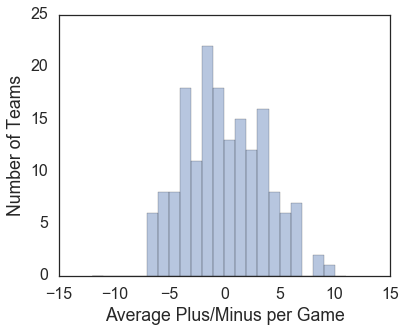

In [58]:
sns.set_context('poster')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 5))
sns.distplot(sph['plusminus'], kde=False, bins=range(-12,12))
plt.ylabel('Number of Teams')
plt.xlabel('Average Plus/Minus per Game')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'PlusMinusDistribution'))

In [94]:
whoa = (sph['plusminus']) >= 5
len(sph[whoa])

16

In [93]:
whoa = (sph['plusminus']) <= -5
len(sph[whoa])

14

In [29]:
len(sph)

171

In [30]:
171 / 7.

24.428571428571427

In [31]:
sph.head()

,Unnamed: 0,Unnamed: 0.1,divname,divrating,plusminus,season,teamid,teamname,type,year,self_rating,captain_rating,draft_rating,experience_rating
78,78,78,JP Mixed (4/3),0.0,6.800000,Spring,40309,Mark Hammer (1),Hat,2016,51.657980,54.342020,53.000000,1269.603025
79,79,79,JP Mixed (4/3),0.0,6.333333,Spring,40310,R2Team2 (2),Hat,2016,52.185185,53.014815,52.600000,1352.263306
80,80,80,JP Mixed (4/3),0.0,4.333333,Spring,40311,Chewblocka (3),Hat,2016,49.710101,54.689899,52.200000,1345.951651
81,81,81,JP Mixed (4/3),0.0,-1.800000,Spring,40312,Never Teal Me The Odds (4),Hat,2016,51.327705,51.472295,51.400000,1106.513497
82,82,82,JP Mixed (4/3),0.0,-2.000000,Spring,40313,Ernest goes to Doyle's (5),Hat,2016,55.491738,52.641595,54.066667,1107.501716


In [32]:
30/171.

0.17543859649122806

In [42]:
years = range(2010, 2017)
for year in years:
    sph_index1 = (ratings.allteams['season'] == 'Spring') & \
            (ratings.allteams['type'] == 'Hat') & \
            (ratings.allteams['divname'] == 'JP Mixed (4/3)') & \
            (ratings.allteams['year'] == year)
    sph1 = ratings.allteams[sph_index1]
    print(year, len(sph1))

(2010, 28)
(2011, 24)
(2012, 24)
(2013, 24)
(2014, 23)
(2015, 24)
(2016, 24)


In [43]:
year = 2014
sph_index1 = (ratings.allteams['season'] == 'Spring') & \
        (ratings.allteams['type'] == 'Hat') & \
        (ratings.allteams['divname'] == 'JP Mixed (4/3)') & \
        (ratings.allteams['year'] == year)
sph1 = ratings.allteams[sph_index1]


In [44]:
sph1

,Unnamed: 0,Unnamed: 0.1,divname,divrating,plusminus,season,teamid,teamname,type,year,self_rating,captain_rating,draft_rating,experience_rating
549,549,549,JP Mixed (4/3),0.0,-6.200000,Spring,36544,Winter Swill Gang (1),Hat,2014,52.922924,48.077076,50.500000,1142.824305
550,550,550,JP Mixed (4/3),0.0,9.333333,Spring,36545,Two if by Sea (2),Hat,2014,46.990074,54.884926,50.937500,1274.370441
551,551,551,JP Mixed (4/3),0.0,-2.857143,Spring,36546,Quality Comfort and Price (3),Hat,2014,51.654018,50.220982,50.937500,1204.437612
552,552,552,JP Mixed (4/3),0.0,1.833333,Spring,36547,Callahan Tunnel (4),Hat,2014,49.703646,52.046354,50.875000,1240.555548
553,553,553,JP Mixed (4/3),0.0,-4.333333,Spring,36548,USS Cutstitution (5),Hat,2014,51.332813,50.917187,51.125000,1175.209420
554,554,554,JP Mixed (4/3),0.0,3.833333,Spring,36549,Make Way for Hucklings (6),Hat,2014,52.298643,47.826357,50.062500,1111.473187
555,555,555,JP Mixed (4/3),0.0,-4.000000,Spring,36550,Donnie Stallberg (7),Hat,2014,46.406662,49.718338,48.062500,1074.428412
556,556,556,JP Mixed (4/3),0.0,-4.571429,Spring,36551,JP Flicks (8),Hat,2014,54.401042,47.848958,51.125000,1180.879226
557,557,557,JP Mixed (4/3),0.0,1.333333,Spring,36552,Mahky Mahk and the Nu Ds (9),Hat,2014,50.807292,49.692708,50.250000,1259.949807
558,558,558,JP Mixed (4/3),0.0,-1.166667,Spring,36553,Ten Teal Seals in a Touch Tank (10),Hat,2014,50.493056,52.506944,51.500000,1315.944470


In [45]:
11/7.

1.5714285714285714

There is one missing team in 2014: Team 17 Flesh Eating Virus.  They went 5-2 with a total plus/minus of +11.  So a per-game +/- of +1.57.  No need to worry about this missing data point.

#### Part 2: Convert average plus/minus into likelihood of winning.

If I know the average number of goals scored in a game and I know the length of each game, then I can get an estimate of the average scoring rate.

Suppose average number of goals scored per game is 18. And that game length is 70 minutes. 

In [17]:
goalpermin = 18/70.
goalpermin

0.2571428571428571

Then the average number of goals per minute is 0.257 goals/minute.

In [13]:
ok = [poisson(goalpermin, 70).sum() for i in range(171)]

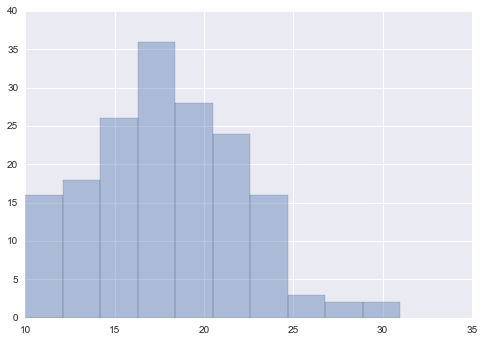

In [14]:
sns.distplot(ok, kde=False)

That looks like a pretty reasonable distribution of point totals per game.

Next, the question we are really interested in: suppose you are on a team that has a plus/minus average per game of -5.  If the halves are split evenly in time, then at halftime you are typically behind by 2.5 points, and there are another 18 or so points to be played.  

I am missing something here.  Need some measure of the variance of plus/minus values.  Time to sleep on it.

In [15]:
18 / 70.

0.2571428571428571

In [16]:
0.257 / 2

0.1285

An average team playing against an average team has an expected goal scoring rate of 0.257 / 2 = 0.128 goals/minute. A team that averages -5 plus/minus per game gives up 2.5 goals more pre 70 minutes and scores 2.5 goals less per 70 minutes while playing an average team.

In [95]:
gpm1 = 18 / 2 - 3.5

In [96]:
gpm2 = 18/2 + 1.5

In [98]:
gpm1 / 70.

0.07857142857142857

In [99]:
gpm2/70.

0.15

In [19]:
ok1 = [poisson(gpm1) for i in range(171)]

In [20]:
ok2 = [poisson(gpm2) for i in range(171)]

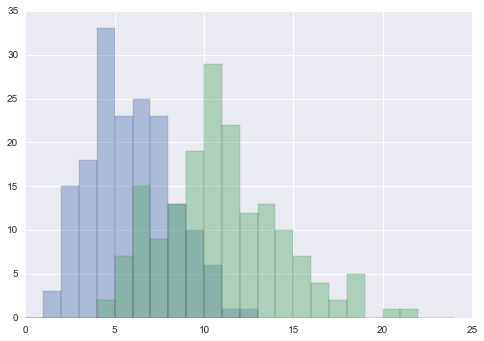

In [21]:
sns.distplot(ok1, kde=False, bins=range(25))
sns.distplot(ok2, kde=False, bins=range(25))

In [22]:
okdiff = np.array(ok1) - np.array(ok2)
oksum = np.array(ok1) + np.array(ok2)

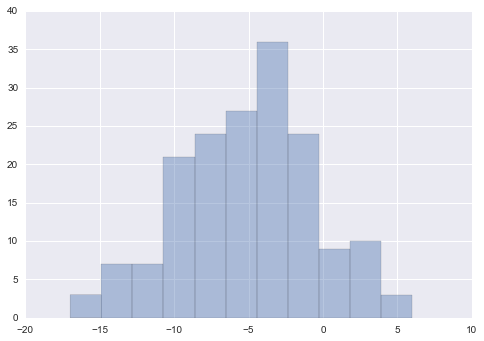

In [23]:
sns.distplot(okdiff, kde=False)

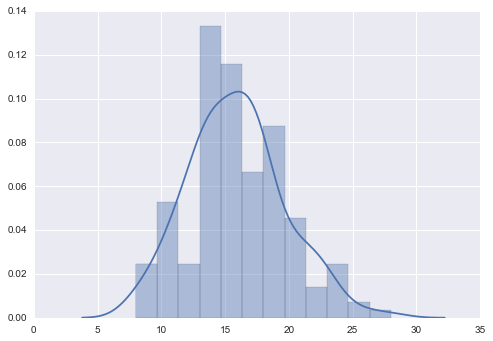

In [24]:
sns.distplot(oksum)

In [25]:
np.mean(okdiff)

-5.0760233918128659

In [26]:
ok = [poisson(gpm1, 70).sum() + poisson(gpm2, 70).sum() for i in range(171)]

In [27]:
np.mean(ok)

1122.2631578947369

In [11]:
def underdogwin(gpm1, gpm2, remaining_time, thresh):
    ok1 = [poisson(gpm1, 70 - remaining_time).sum() for i in range(100)]
    ok2 = [poisson(gpm2, 70 - remaining_time).sum() for i in range(100)]
    okdiff = np.array(ok1) - np.array(ok2)
    over5 = okdiff > thresh
    return len(okdiff[over5])

In [29]:
nsim = 100
sim_come0 = []
sim_come1 = []
sim_come2 = []
sim_come3 = []
for isim in tqdm(range(nsim)):
    come_from_behind0 = []
    come_from_behind1 = []
    come_from_behind2 = []
    come_from_behind3 = []
    remaining_times = range(70)
    for remaining_time in remaining_times:
        gpm1 = 18 / 2 / 70.
        gpm2 = 18 / 2 / 70.
        thresh = 0
        wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
        come_from_behind0.append(wins)
        
        thresh = 1
        wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
        come_from_behind1.append(wins)
        
        thresh = 2
        wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
        come_from_behind2.append(wins)
        
        thresh = 3
        wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
        come_from_behind3.append(wins)
    sim_come0.append(come_from_behind0)
    sim_come1.append(come_from_behind1)
    sim_come2.append(come_from_behind2)
    sim_come3.append(come_from_behind3)
come_mean0 = np.mean(sim_come0, axis=0)
come_mean1 = np.mean(sim_come1, axis=0)
come_mean2 = np.mean(sim_come2, axis=0)
come_mean3 = np.mean(sim_come3, axis=0)
come_std0 = np.std(sim_come0, axis=0)
come_std1 = np.std(sim_come1, axis=0)
come_std2 = np.std(sim_come2, axis=0)
come_std3 = np.std(sim_come3, axis=0)

100%|██████████| 100/100 [00:25<00:00,  3.89it/s]


In [12]:
nsim = 100
sim_comes = []
threshes = range(4)
for thresh in threshes:
    sim_come = []
    for isim in tqdm(range(nsim)):
        come_from_behind = []
        remaining_times = range(70)
        for remaining_time in remaining_times:
            gpm1 = 18 / 2 / 70.
            gpm2 = 18 / 2 / 70.
            wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
            come_from_behind.append(wins)
        sim_come.append(come_from_behind)
    sim_comes.append(sim_come)
come_mean0 = np.mean(sim_comes[0], axis=0)
come_mean1 = np.mean(sim_comes[1], axis=0)
come_mean2 = np.mean(sim_comes[2], axis=0)
come_mean3 = np.mean(sim_comes[3], axis=0)
come_std0 = np.std(sim_comes[0], axis=0)
come_std1 = np.std(sim_comes[1], axis=0)
come_std2 = np.std(sim_comes[2], axis=0)
come_std3 = np.std(sim_comes[3], axis=0)

100%|██████████| 100/100 [00:06<00:00, 16.32it/s]


In [13]:
nsim = 100
sim_comes = []
threshes = range(4)
for thresh in threshes:
    sim_come = []
    for isim in tqdm(range(nsim)):
        come_from_behind = []
        remaining_times = range(70)
        for remaining_time in remaining_times:
            gpm1 = 18 / 2 / 70. - 3.5 / 70
            gpm2 = 18 / 2 / 70. + 1.5 / 70
            wins = underdogwin(gpm1, gpm2, remaining_time, thresh)
            come_from_behind.append(wins)
        sim_come.append(come_from_behind)
    sim_comes.append(sim_come)
come_mean0_bad = np.mean(sim_comes[0], axis=0)
come_mean1_bad = np.mean(sim_comes[1], axis=0)
come_mean2_bad = np.mean(sim_comes[2], axis=0)
come_mean3_bad = np.mean(sim_comes[3], axis=0)
come_std0_bad = np.std(sim_comes[0], axis=0)
come_std1_bad = np.std(sim_comes[1], axis=0)
come_std2_bad = np.std(sim_comes[2], axis=0)
come_std3_bad = np.std(sim_comes[3], axis=0)

100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


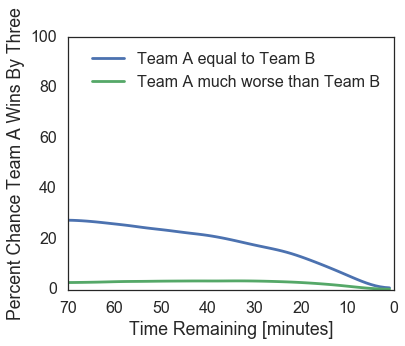

In [14]:
sns.set_context('poster')
sns.set_style('white')
f, ax = plt.subplots(figsize=(6, 5))
xarr = np.arange(len(come_mean2_bad), 0, -1)
yarr = gaussian_filter1d(come_mean2, 3)
sigarr = gaussian_filter1d(come_std2, 3)
y1 = yarr - sigarr
y2 = yarr + sigarr
# plt.fill_between(xarr, y1, y2, color='gray', alpha=0.4)
plt.plot(xarr, yarr, label='Team A equal to Team B')


yarr = gaussian_filter1d(come_mean2_bad, 3)
sigarr = gaussian_filter1d(come_std2_bad, 3)
y1 = yarr - sigarr
y2 = yarr + sigarr
# plt.fill_between(xarr, y1, y2, color='gray', alpha=0.4)
plt.plot(xarr, yarr, label='Team A much worse than Team B')

plt.ylim([0, 100])
plt.xlim([70,0])
plt.xlabel('Time Remaining [minutes]')
plt.ylabel('Percent Chance Team A Wins By Three')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'WinBy3Probability'))
# plt.plot(come_mean_bad)

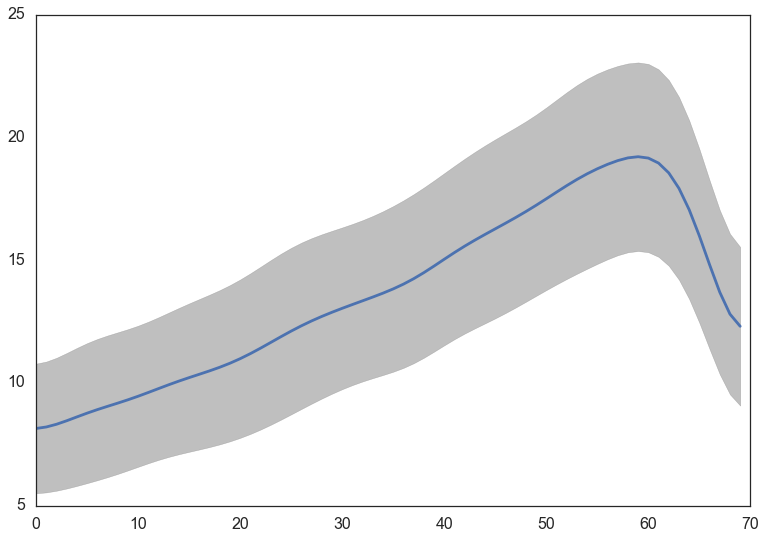

In [223]:
sns.set_context('poster')
# xarr = range(len(come_mean2))
# yarr = gaussian_filter1d(come_mean2, 3)
# sigarr = gaussian_filter1d(come_std2, 3)
# y1 = yarr - sigarr
# y2 = yarr + sigarr
# plt.fill_between(xarr, y1, y2, color='gray', alpha=0.5)
# plt.plot(xarr, yarr)

xarr = range(len(come_mean0_bad))
yarr = gaussian_filter1d(come_mean0_bad, 3)
sigarr = gaussian_filter1d(come_std0_bad, 3)
y1 = yarr - sigarr
y2 = yarr + sigarr
plt.fill_between(xarr, y1, y2, color='gray', alpha=0.5)
plt.plot(xarr, yarr)
# plt.plot(come_mean_bad)

In [10]:
sph_index = (ratings.allteams['season'] == 'Spring') & \
            (ratings.allteams['type'] == 'Hat') & \
            (ratings.allteams['divname'] == 'JP Mixed (4/3)') & \
            (ratings.allteams['year'] >= 2010)
sph = ratings.allteams[sph_index]

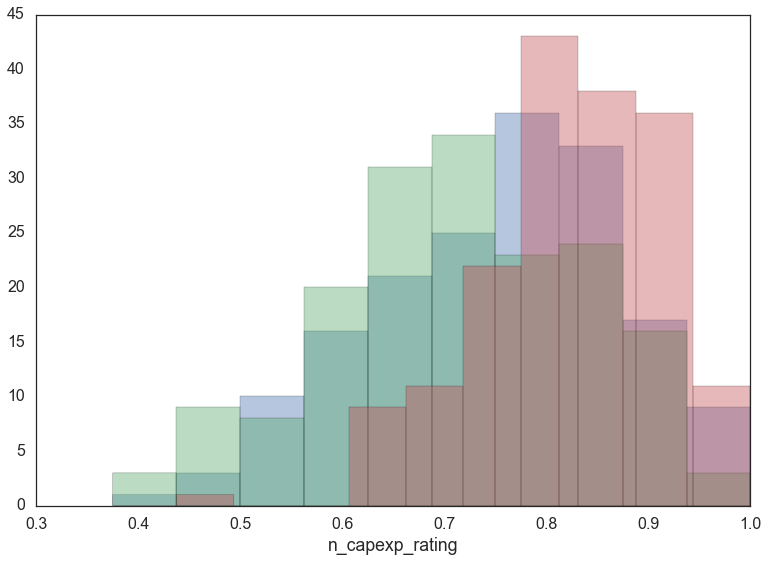

In [84]:
sns.distplot(sph['n_exp_rating'], kde=False, bins=10)
sns.distplot(sph['n_cap_rating'], kde=False, bins=10)
sns.distplot(sph['n_capexp_rating'], kde=False, bins=10)

In [80]:
sph['n_exp_rating'].mean()

0.7203947368421053

In [81]:
sph['n_cap_rating'].mean()

0.6823830409356725

In [85]:
sph['n_capexp_rating'].mean()

0.8366228070175439

In [82]:
sph['n_exp_rating'].median()

0.75

In [83]:
sph['n_cap_rating'].median()

0.6875

In [86]:
sph['n_capexp_rating'].median()

0.8125

In [70]:
.75*16

12.0

In [71]:
.69*16

11.04

In [87]:
.84*16

13.44

Simulation of two evenly matched teams.  What is the distribution of 171 instances of observed average point differential over 7 games?

In [88]:
goalpermin

0.2571428571428571

In [23]:
avgoff = []
for isim in range(171):
    ok1 = [poisson(goalpermin/2, 70).sum() for i in range(7)]
    ok2 = [poisson(goalpermin/2, 70).sum() for i in range(7)]
    off = np.array(ok1) - np.array(ok2)
    avgoff.append(off.mean())

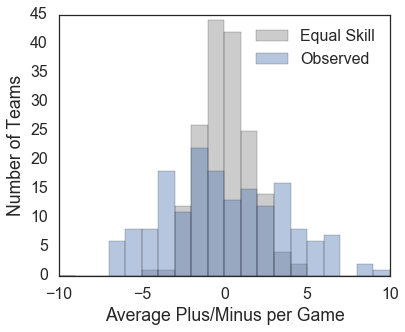

In [109]:
sns.set_context('poster')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 5))
sns.distplot(avgoff, kde=False, bins=range(-10, 11), color='gray', label='Equal Skill')
sns.distplot(sph['plusminus'], kde=False, bins=range(-10,11), label='Observed')
plt.ylabel('Number of Teams')
plt.xlabel('Average Plus/Minus per Game')
plt.tight_layout()
plt.legend()
plt.savefig(os.path.join(figures_dir, 'PlusMinusDistribution'))

Given equal teams, what is the likelihood of winning fewer than 10% of your games?

In [18]:
wins = []
for isim in range(171):
    ok1 = [poisson(goalpermin/2, 70).sum() for i in range(7)]
    ok2 = [poisson(goalpermin/2, 70).sum() for i in range(7)]
    off = np.array(ok1) - np.array(ok2)
    win_index = off > 0
    wins.append(len(off[win_index]))

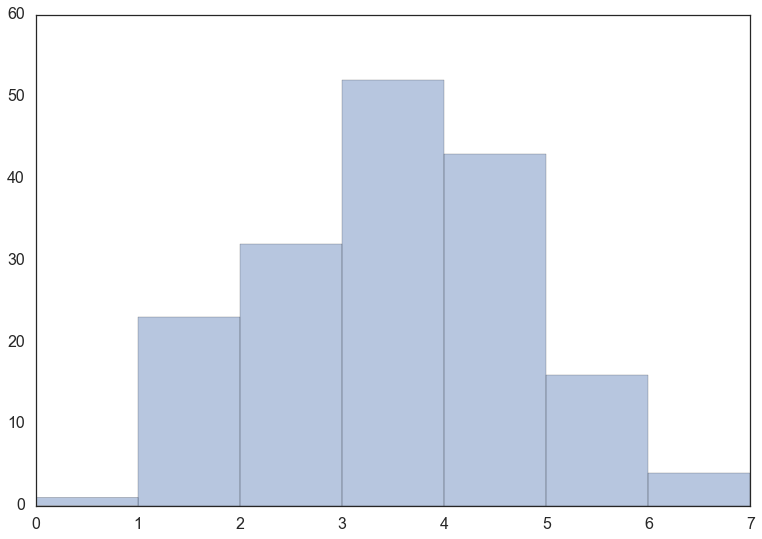

In [19]:
sns.distplot(wins, kde=False, bins=range(8))

In [120]:
np.array(wins).sum()

564

In [121]:
7 * 171

1197

In [122]:
564 / 1197.

0.47117794486215536

In [123]:
1/7.

0.14285714285714285

In [130]:
n1 = len(np.array(wins)[np.array(wins) < 1])

In [131]:
n1

2

In [132]:
2 / 171.

0.011695906432748537

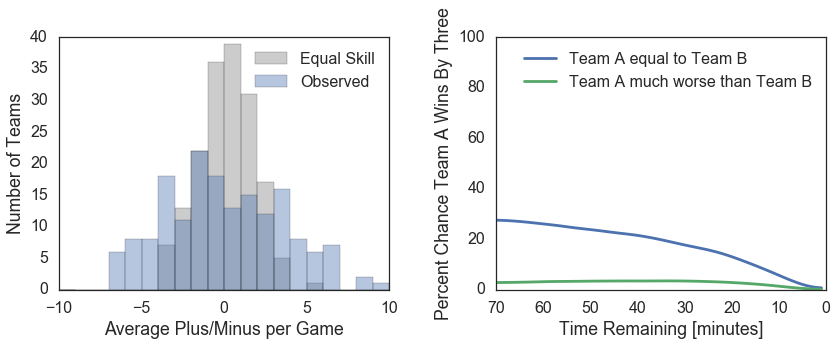

In [28]:
sns.set_context('poster')
sns.set_style('white')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
sns.distplot(avgoff, kde=False, bins=range(-10, 11), color='gray', label='Equal Skill', ax=ax)
sns.distplot(sph['plusminus'], kde=False, bins=range(-10,11), label='Observed', ax=ax)
ax.set_ylabel('Number of Teams')
ax.set_xlabel('Average Plus/Minus per Game')
ax.legend()

ax = axes[1]
xarr = np.arange(len(come_mean2_bad), 0, -1)
yarr = gaussian_filter1d(come_mean2, 3)
sigarr = gaussian_filter1d(come_std2, 3)
y1 = yarr - sigarr
y2 = yarr + sigarr
# plt.fill_between(xarr, y1, y2, color='gray', alpha=0.4)
ax.plot(xarr, yarr, label='Team A equal to Team B')


yarr = gaussian_filter1d(come_mean2_bad, 3)
sigarr = gaussian_filter1d(come_std2_bad, 3)
y1 = yarr - sigarr
y2 = yarr + sigarr
# plt.fill_between(xarr, y1, y2, color='gray', alpha=0.4)
ax.plot(xarr, yarr, label='Team A much worse than Team B')

ax.set_ylim([0, 100])
ax.set_xlim([70,0])
ax.set_xlabel('Time Remaining [minutes]')
ax.set_ylabel('Percent Chance Team A Wins By Three')
ax.legend()
plt.tight_layout(w_pad=2)
plt.savefig(os.path.join(figures_dir, 'PlusMinusDistribution_WinBy3Probability'))
# plt.plot(come_mean_bad)

An alternative way of investigating the probability of winning one game out of 7 or less: simple probability.

In [3]:
ways_to_win_one_or_less = 7 + 1

In [7]:
total_possible_outcomes = 2. ** 7

In [8]:
probability = ways_to_win_one_or_less / total_possible_outcomes

In [9]:
probability

0.0625

In [10]:
1 / 7.

0.14285714285714285

In [13]:
7 * 5 * 4 / 3 / 2. / 2**7

0.1796875

In [14]:
corepart = 1.396 + 1.476 + 1.484 + 1.363 + 1.082 + 1.038

In [16]:
corepart / 6.

1.3065

In [17]:
lcp = 786. + 800 + 819 + 899 + 1032 + 947
lcp / 6

880.5

In [18]:
rcp = 342. + 306 + 361 + 427 + 440 + 431
rcp / 6

384.5

In [19]:
(13651 - 8467) / 8467.

0.6122593598677217

In [20]:
8467 * 1.6

13547.2

In [12]:
7/11.

0.6363636363636364

In [26]:
leaguelist = {'alabama': 3, 'arkansas': 3, 'alaska': 3, 'arizona': 3, 'california': 10, 'colorado': 7, 'connecticut': 4,  
 'delaware': 1, 'florida': 9, 'georgia': 5, 'hawaii': 1, 'idaho': 1, 'illinois': 4, 'indiana': 8, 'iowa': 5, 
 'kansas': 4, 'kentucky': 2, 'louisiana': 1, 'maine': 3, 'maryland': 5, 'massachusetts': 2, 
 'michigan': 6, 'minnesota': 2, 'mississippi': 2, 'missouri': 2, 'montana': 2, 'nebraska': 2, 'nevada': 2, 
 'new hampshire': 1, 'new jersey': 5, 'new mexico': 3, 'new york': 11, 'north carolina': 8, 'north dakota': 0,
 'ohio': 4, 'oklahoma': 1, 'oregon': 6, 'pennsylvania': 6, 'rhode island': 1, 'south carolina': 5, 'south dakota': 1,
 'tennessee': 4, 'texas': 6, 'utah': 4, 'vermont': 2, 'virginia': 6, 
 'washington': 3, 'west virginia': 0, 'wisconsin': 3, 'wyoming': 0}

In [27]:
totleagues = 0
for key in leaguelist:
    totleagues += leaguelist[key]

In [28]:
totleagues

182

In [29]:
yarr

NameError: name 'yarr' is not defined

,Unnamed: 0,divname,divrating,plusminus,season,teamid,teamname,type,year,self_rating,captain_rating,draft_rating,experience_rating,ensemble_rating,n_exp_rating,n_cap_rating,n_capexp_rating
78,78,JP Mixed (4/3),0.0,6.800000,Spring,40309,Mark Hammer (1),Hat,2016,51.657980,54.342020,53.000000,1269.603025,54.405444,0.5625,0.5625,0.6250
79,79,JP Mixed (4/3),0.0,6.333333,Spring,40310,R2Team2 (2),Hat,2016,52.185185,53.014815,52.600000,1352.263306,55.415133,0.6875,0.6875,0.8125
80,80,JP Mixed (4/3),0.0,4.333333,Spring,40311,Chewblocka (3),Hat,2016,49.710101,54.689899,52.200000,1345.951651,55.327074,0.8750,0.8125,0.9375
81,81,JP Mixed (4/3),0.0,-1.800000,Spring,40312,Never Teal Me The Odds (4),Hat,2016,51.327705,51.472295,51.400000,1106.513497,47.253289,0.8125,0.6875,0.8125
82,82,JP Mixed (4/3),0.0,-2.000000,Spring,40313,Ernest goes to Doyle's (5),Hat,2016,55.491738,52.641595,54.066667,1107.501716,48.209827,0.8125,0.7500,0.8125


In [1]:
200/60.

3.3333333333333335

In [2]:
1/3. * (1800 + 1580 + 1400)

1593.3333333333333

In [3]:
16/6.

2.6666666666666665

In [4]:
.84*16

13.44

In [6]:
import seaborn as sns

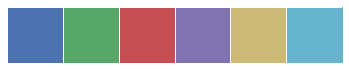

In [10]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [11]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]